# EDA: Exploratory Data Analysis，探索性数据分析

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f"train shape: {train.shape}, test shape: {test.shape}")

train shape: (1460, 81), test shape: (1459, 80)


In [3]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0],
                  train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values',
                                        'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
72,PoolQC,3,99.520548,99.520548,object
74,MiscFeature,4,96.301370,96.301370,object
6,Alley,2,93.767123,93.767123,object
73,Fence,4,80.753425,80.753425,object
25,MasVnrType,3,59.726027,59.726027,object
...,...,...,...,...,...
27,ExterQual,4,0.000000,62.054795,object
24,Exterior2nd,16,0.000000,34.520548,object
23,Exterior1st,15,0.000000,35.273973,object
22,RoofMatl,8,0.000000,98.219178,object


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


def describe_and_visualize(df, table_name):
    print("\n[log] -------------------- \n")
    print(f"分析表格：{table_name}")
    print(f"表格的形状：{df.shape}")

    categorical_columns = []  # 类别型字段
    numerical_columns = []  # 数值型字段

    # 分类字段与数值字段区分
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].nunique() < 30:  # 类别型或唯一值较少
            categorical_columns.append(column)
        else:
            numerical_columns.append(column)

    # 输出类别型字段的信息
    print(f"\n>>> 类别型字段（{len(categorical_columns)} 个）：{categorical_columns}")
    for column in categorical_columns:
        print(f"字段：{column}")
        print(f"{column}是类别型数据，共有{df[column].nunique()}个不同的值")
        print(df[column].value_counts())

    # 绘制类别型字段的条形图
    if categorical_columns:
        print("\n[log] 正在绘制类别型字段的统计图...")
        rows = math.ceil(len(categorical_columns) / 4)
        fig, axes = plt.subplots(rows, min(len(categorical_columns), 4), figsize=(20, 5 * rows))
        axes = axes.flatten()  # 展平方便处理
        for i, column in enumerate(categorical_columns):
            df[column].value_counts().plot(kind='bar', ax=axes[i], title=f'{column} - Count Values')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
        # 隐藏多余的子图
        for j in range(len(categorical_columns), len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()

    # 输出数值型字段的信息
    print(f"\n>>> 数值型字段（{len(numerical_columns)} 个）：{numerical_columns}")
    for column in numerical_columns:
        print(f"\n字段：{column}")
        print(f"{column}是数值型数据，共有{df[column].nunique()}个不同的值")
        print(df[column].describe())

    # 绘制数值型字段的分布图
    if numerical_columns:
        print("\n[log] 正在绘制数值型字段的分布图...")
        rows = math.ceil(len(numerical_columns) / 4)
        fig, axes = plt.subplots(rows, min(len(numerical_columns), 4), figsize=(20, 5 * rows))
        axes = axes.flatten()  # 展平方便处理
        for i, column in enumerate(numerical_columns):
            sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
            axes[i].set_title(f'{column} - Distribution')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
        # 隐藏多余的子图
        for j in range(len(numerical_columns), len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()


[log] -------------------- 

分析表格：train
表格的形状：(1460, 81)

>>> 类别型字段（61 个）：['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
字段：MSSubClass
MSSubClass是类别型数据，共有15个不同的值
MSSubClass
20     536
60     299
50     144
120     87
3

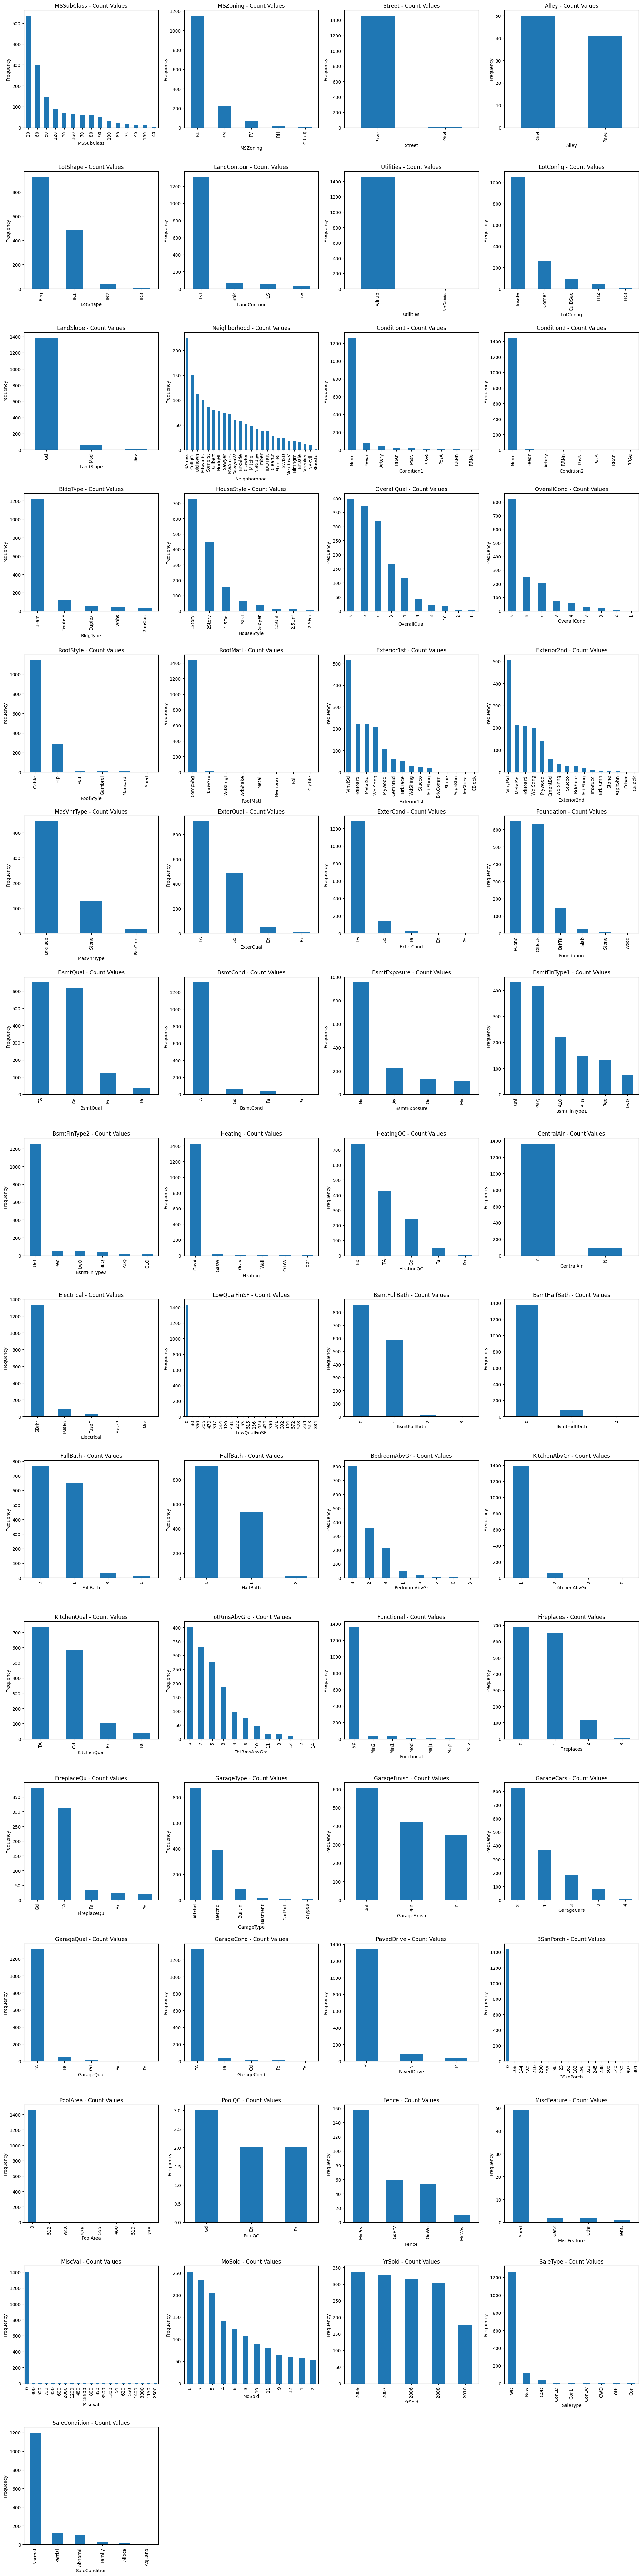


>>> 数值型字段（20 个）：['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']

字段：Id
Id是数值型数据，共有1460个不同的值
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64

字段：LotFrontage
LotFrontage是数值型数据，共有110个不同的值
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

字段：LotArea
LotArea是数值型数据，共有1073个不同的值
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype:

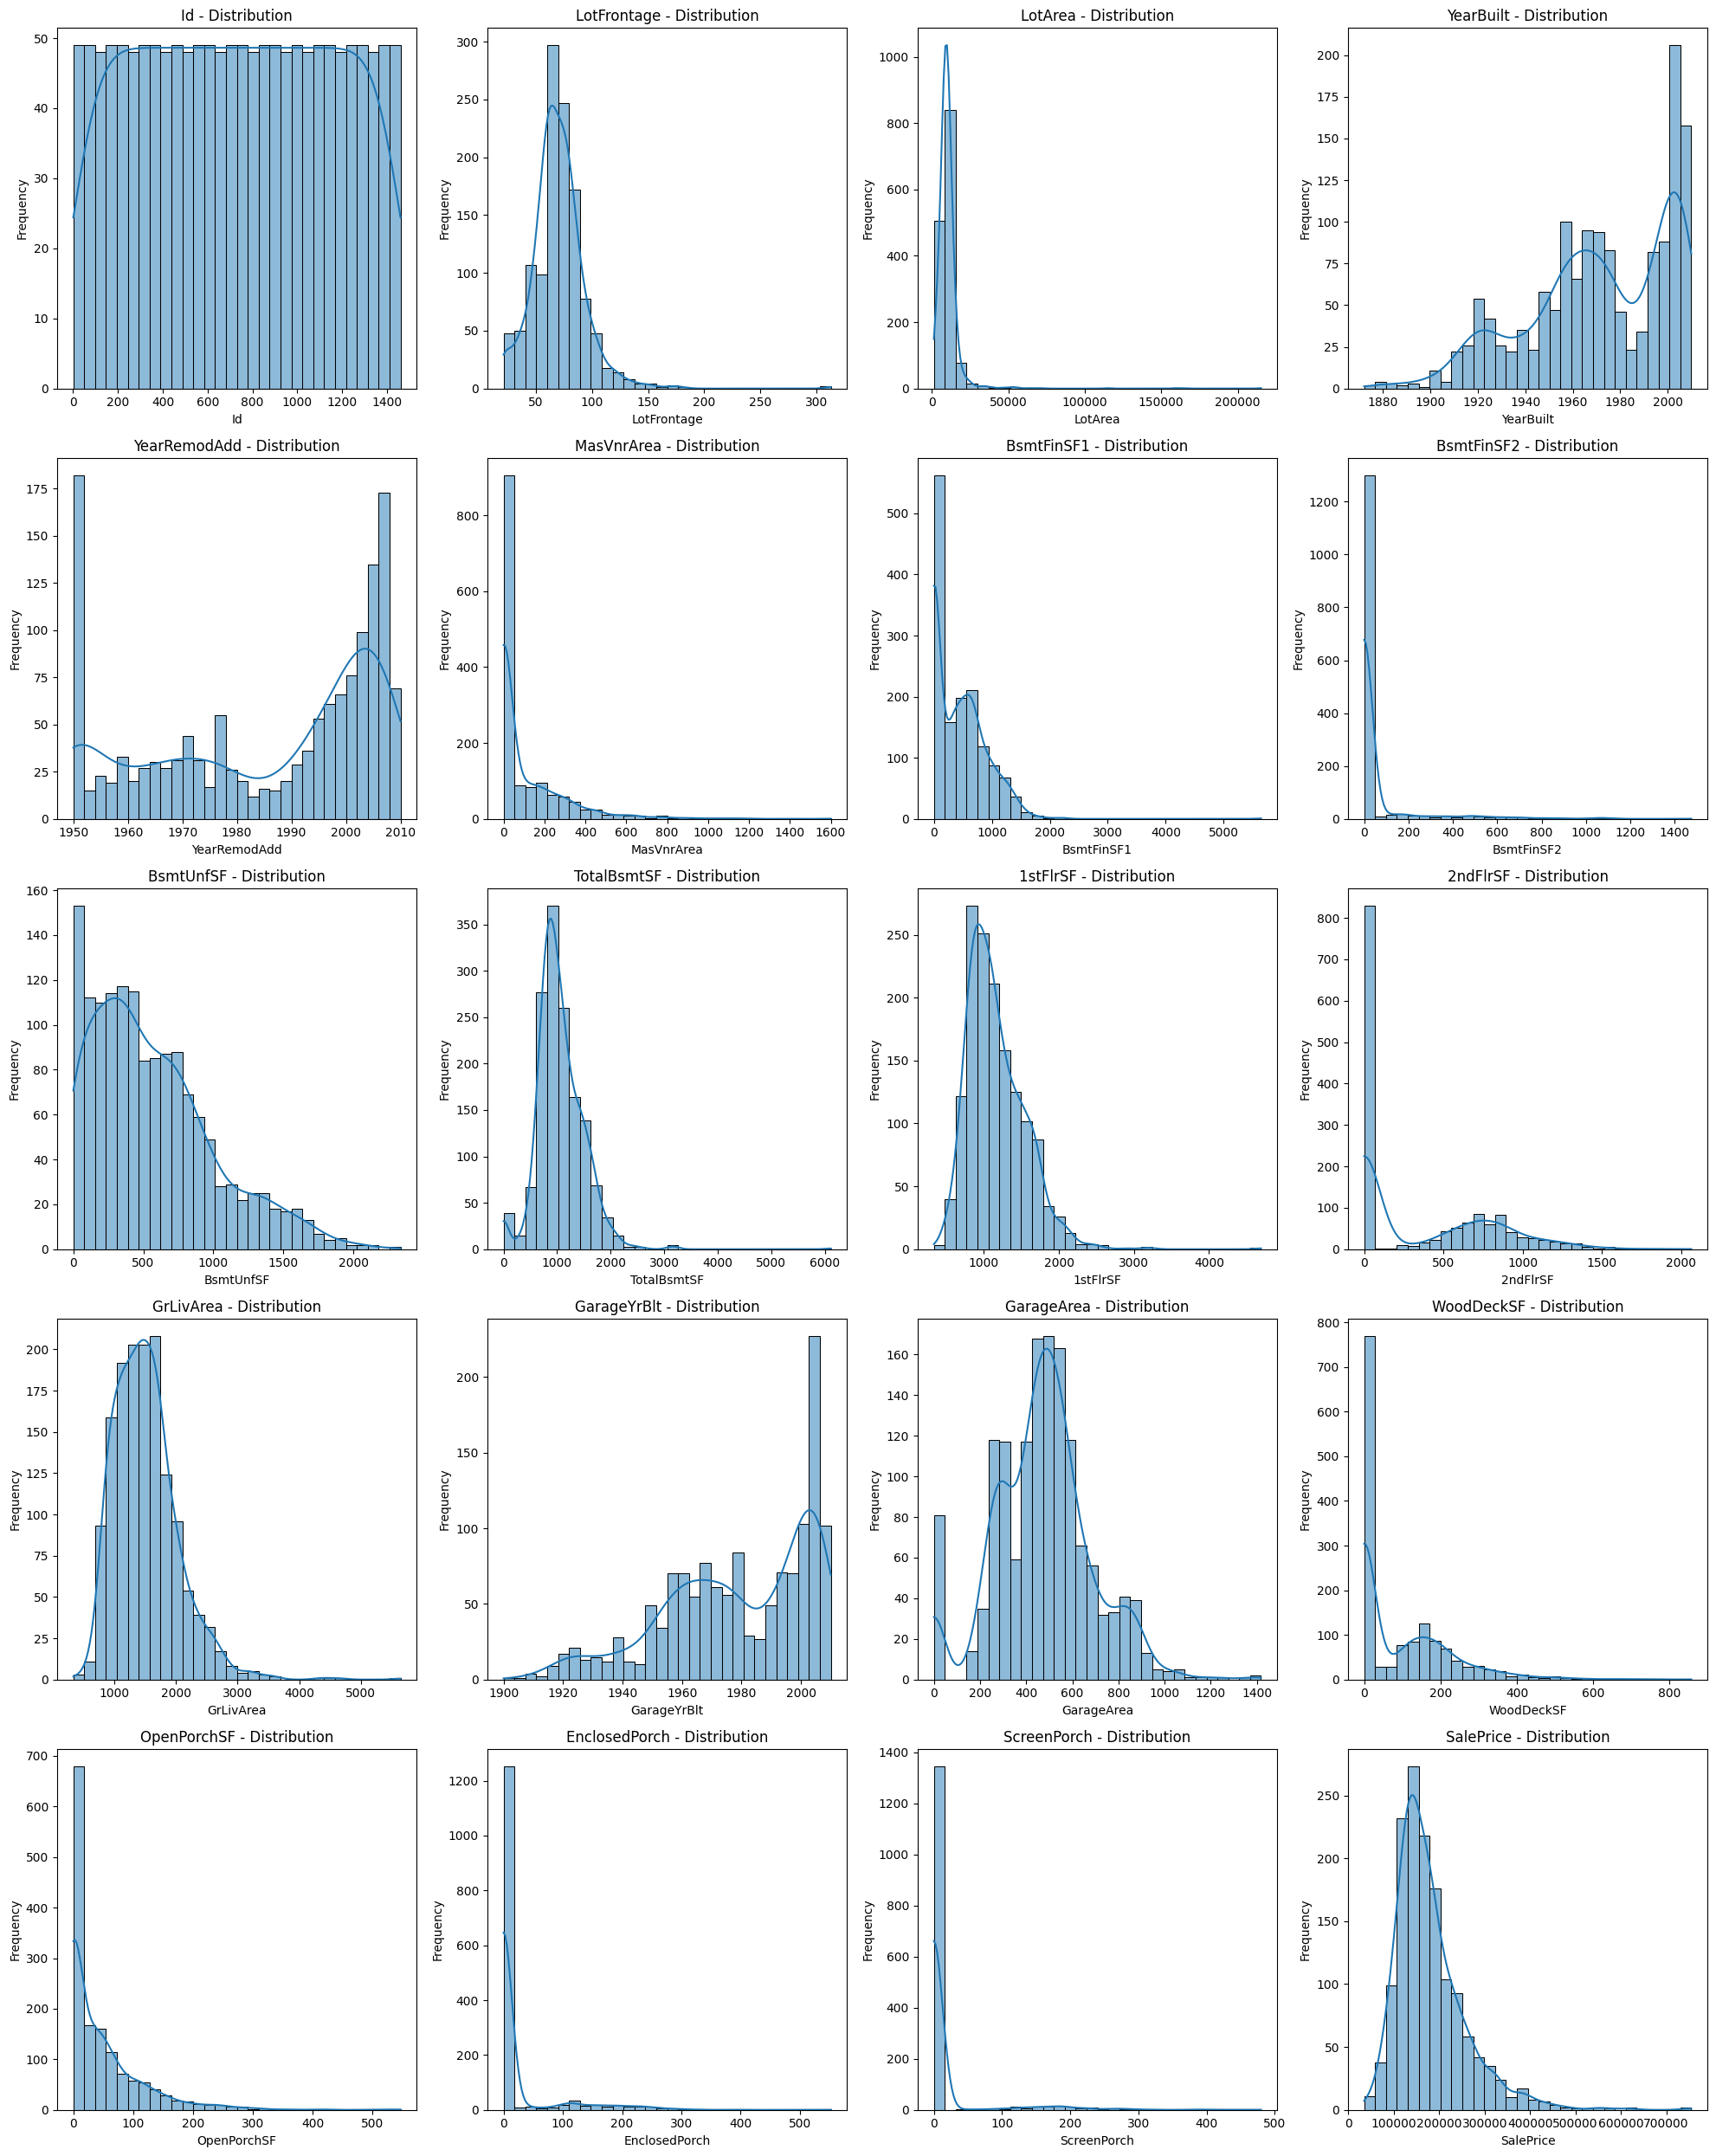

In [5]:
describe_and_visualize(train, 'train')

In [8]:
sales_mean = train['SalePrice'].mean()
print(f"SalePrice的均值：{sales_mean}")
test_preds = np.full(test.shape[0], sales_mean)
submission = pd.DataFrame({
    'Id': test['Id'],  # 保持测试集的ID列
    'SalePrice': test_preds  # 预测的结果列
})
submission.to_csv("output/EDA/submission_mean.csv", index=False)

SalePrice的均值：180921.19589041095
